<a href="https://colab.research.google.com/github/DragonFarts/Video-EZY/blob/main/wip_KFC_BOYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

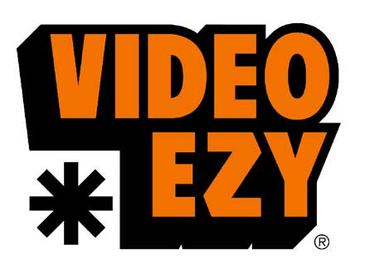

**Demo of the VideoEzy v0.03**

I will be bringing back all the features and more of VideoEzy into this.
This code is much cleaner and easier to manage for me.


1.   Write your script
2.   Install the requirements
3.   Generate your video

your video will appear in

/content/AAA_Movies/



# write your shit and produce music tracks

In [ ]:
%%writefile /content/music.txt
30 "80s pop music in styles of madonna" "/content/out/music_2.wav"

Overwriting /content/music.txt


In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--makevid
temp1 1 temp2 2 temp3 3
--dubvid
wav1 3
##Finish##
##Scene2##
--genvid
"a fart on my balls production!, Movie Title Screen, hd, high quality" 3
"wet spot on my pants, Movie Title Screen, hd, high quality" 3
--makevid
temp1 3 temp2 2 temp3 1
--dubvid
wav2 3
##Finish##
##Scene3##
--makevid
temp4 1 temp5 1 temp6 1
--dubvid
wav3 3
##Finish##

Overwriting /content/script_bulk.txt


# install the crap

In [1]:
!mkdir -p /content/fonts/ && wget -O /content/fonts/FFF_Tusj.ttf https://github.com/DragonFarts/Video-EZY/raw/main/FFF_Tusj.ttf

--2023-10-15 20:29:19--  https://github.com/DragonFarts/Video-EZY/raw/main/FFF_Tusj.ttf
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DragonFarts/Video-EZY/main/FFF_Tusj.ttf [following]
--2023-10-15 20:29:20--  https://raw.githubusercontent.com/DragonFarts/Video-EZY/main/FFF_Tusj.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543648 (1.5M) [application/octet-stream]
Saving to: ‘/content/fonts/FFF_Tusj.ttf’

/content/fonts/FFF_ 100%[===================>]   1.47M  --.-KB/s    in 0.02s   

2023-10-15 20:29:20 (97.6 MB/s) - ‘/content/fonts/FFF_Tusj.ttf’ saved [1543648/1543648]



In [33]:
%%writefile /content/ezmake.py
import sys

def print_temp_values(num, value):
    for i in range(1, num + 1):
        print(f"temp{i} {value}", end=" ")
    print()  # To move to the next line after printing

# Ensure that there are at least 3 command-line arguments provided (script name + 2 arguments)
if len(sys.argv) >= 3:
    num = int(sys.argv[1])
    value = sys.argv[2]
    print_temp_values(num, value)
else:
    print("Please provide the required arguments.")


Overwriting /content/ezmake.py


In [2]:
%%writefile /content/backup.py
import zipfile
import os

def zipdir(path, ziph):
    """
    Recursively add files in 'path' to the zip file handler 'ziph'
    """
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(path, '..')))

# Specify the directories to be zipped
directories_to_zip = ["/content/AAA_Movies", "/content/out"]

# Destination zip file
dst_zip = "/content/downloadme.zip"

# Create the zip file
with zipfile.ZipFile(dst_zip, 'w') as zipf:
    for dir_to_zip in directories_to_zip:
        zipdir(dir_to_zip, zipf)

print(f"Zipped directories to {dst_zip}")


Writing /content/backup.py


In [3]:
%%writefile /content/volume.py
# volume.py
from pydub import AudioSegment
import sys
import os

def adjust_volume(file_path, change_in_volume):
    """
    Adjust the volume of the given audio or video file based on its extension.

    :param file_path: Path to the audio or video file.
    :param change_in_volume: Amount to increase (+) or decrease (-) the volume.
    :return: None
    """
    file_extension = os.path.splitext(file_path)[1][1:].lower()

    if file_extension == "mp4":
        audio = AudioSegment.from_file(file_path, format="mp4")
    elif file_extension == "wav":
        audio = AudioSegment.from_wav(file_path)
    else:
        print(f"Unsupported file extension: .{file_extension}")
        return

    modified_audio = audio + change_in_volume
    modified_audio.export(file_path, format=file_extension)

    print(f"Adjusted volume for {file_path} by {change_in_volume} dB.")

if __name__ == "__main__":
    if len(sys.argv) < 3:
        print("Usage: volume.py <volume_change> <file_path1> [<file_path2> ...]")
        sys.exit(1)

    volume_change = int(sys.argv[1])
    file_paths = sys.argv[2:]

    for file_path in file_paths:
        adjust_volume(file_path, volume_change)


Writing /content/volume.py


**Install Tortoise**

In [4]:
!pip install moviepy
%cd /content
!git clone -b dev https://github.com/camenduru/tortoise-hf
%cd /content/tortoise-hf
!git clone -b v1.0 https://github.com/camenduru/tortoise-tts

!pip install gradio scipy -U
%cd /content/tortoise-hf/tortoise-tts
!pip install transformers==4.19.0
!pip install -r requirements.txt
!python setup.py install

%cd /content/tortoise-hf
%cd /content

/content
Cloning into 'tortoise-hf'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 117 (delta 64), reused 109 (delta 60), pack-reused 0
Receiving objects: 100% (117/117), 17.93 KiB | 679.00 KiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/tortoise-hf
Cloning into 'tortoise-tts'...
remote: Enumerating objects: 1531, done.
remote: Total 1531 (delta 0), reused 0 (delta 0), pack-reused 1531
Receiving objects: 100% (1531/1531), 53.58 MiB | 9.73 MiB/s, done.
Resolving deltas: 100% (627/627), done.
Updating files: 100% (569/569), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 12

In [5]:
%%writefile /content/updatevoice.py

from pydub import AudioSegment
import os

# Iterate over all mp3 files in the source directory
for filename in os.listdir("/content/#voicemp3"):
    if filename.endswith(".mp3"):
        # Load the MP3 file
        audio_path = os.path.join("/content/#voicemp3", filename)
        audio = AudioSegment.from_mp3(audio_path)

        # Define the duration for each segment in milliseconds (10 seconds = 10000 milliseconds)
        duration_per_segment = 10000

        # Calculate the number of segments
        num_segments = len(audio) // duration_per_segment + (1 if len(audio) % duration_per_segment else 0)

        # Create a new directory for the split files, named after the mp3 file
        new_dir = os.path.join("/content/tortoise-hf/tortoise-tts/tortoise/voices", filename.rsplit(".", 1)[0])
        os.makedirs(new_dir, exist_ok=True)

        # Split the audio and save each segment
        for i in range(num_segments):
            start_time = i * duration_per_segment
            end_time = (i+1) * duration_per_segment
            segment = audio[start_time:end_time]
            segment.export(f"{new_dir}/{i+1}.wav", format="wav")
            print(f"Saved segment {i+1}.wav for {filename}")

print("All segments saved successfully!")

Writing /content/updatevoice.py


In [6]:
%%writefile /content/autodl.py
import argparse
import shutil
import os
from yt_dlp import YoutubeDL
from moviepy.editor import *
from glob import glob
from tqdm import tqdm
from numpy import arange as np_arange
from datetime import timedelta, datetime

# Parameters for frame extraction
SAVING_FRAMES_PER_SECOND = 30

def extract_frames(video_file):
    video_clip = VideoFileClip(video_file)
    filename, _ = os.path.splitext(video_file)
    if not os.path.isdir(filename):
        os.mkdir(filename)
    saving_frames_per_second = min(video_clip.fps, SAVING_FRAMES_PER_SECOND)
    step = 1 / video_clip.fps if saving_frames_per_second == 0 else 1 / saving_frames_per_second
    for current_duration in tqdm(np_arange(0, video_clip.duration, step), desc="Extracting video frames"):

        frame_duration_formatted = format_timedelta(timedelta(seconds=current_duration)).replace(":", "-")
        frame_filename = os.path.join(filename, f"frame{frame_duration_formatted}.jpg")
        video_clip.save_frame(frame_filename, current_duration)
    return filename, video_clip.fps

def reverse_video(frames_path, video_fps):
    frame_files = glob(os.path.join(frames_path, "*"))
    frame_files.sort(key=lambda d: datetime.strptime(d.split("frame")[1], "%H-%M-%S.%f.jpg"), reverse=True)
    saving_frames_per_second = min(video_fps, SAVING_FRAMES_PER_SECOND)
    if saving_frames_per_second == 0:
        saving_frames_per_second = video_fps
    image_sequence_clip = ImageSequenceClip(frame_files, fps=saving_frames_per_second)
    output_filename = f"{frames_path}-inverted.mp4"
    image_sequence_clip.write_videofile(output_filename, codec='libx264', audio_codec='aac')
    shutil.rmtree(frames_path)
    return output_filename
def format_timedelta(td):
    """Utility function to format timedelta objects in a cool way (e.g 00:00:20.05)
    omitting microseconds and retaining milliseconds"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return result + ".00".replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")

def download_video(name, youtubelink, timestamp_start, timestamp_end, reverse_flag):
    output_template = f'/content/vids/{name}.mp4'
    options = {
        'overwrites': True,
        'format': 'bestvideo[ext=mp4]',
        'outtmpl': output_template,
        'postprocessor_args': ['-ss', timestamp_start, '-to', timestamp_end, '-c', 'copy']
    }

    with YoutubeDL(options) as ydl:
        ydl.download([youtubelink])

    if reverse_flag:
        frames_folder_path, video_fps = extract_frames(output_template)
        reverse_video(frames_folder_path, video_fps)
    shutil.move("/content/vids/jim-inverted.mp4", "/content/vids/jim.mp4")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Download videos from YouTube with specific options.")
    parser.add_argument("name", help="Name of the video file.")
    parser.add_argument("youtubelink", help="YouTube link to download.")
    parser.add_argument("timestamp_start", help="Start timestamp for the video download.")
    parser.add_argument("timestamp_end", help="End timestamp for the video download.")
    parser.add_argument("-r", "--reverse", help="Flag to append a reversed version of the video.", action="store_true")

    args = parser.parse_args()
    download_video(args.name, args.youtubelink, args.timestamp_start, args.timestamp_end, args.reverse)


Writing /content/autodl.py


In [7]:
%%writefile /content/audrip.py
import sys
import os
from yt_dlp import YoutubeDL

def download_video_segment(youtube_link, start_time, end_time, index):
    options = {
        'overwrites': True,
        'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
        'outtmpl': f'/content/segment_{index}.%(ext)s',
        'postprocessor_args': ['-ss', start_time, '-to', end_time, '-c', 'copy'],
    }
    with YoutubeDL(options) as ydl:
        ydl.download([youtube_link])

    # Convert downloaded segment to mp3
    os.system(f'ffmpeg -i /content/segment_{index}.mp4 -q:a 0 -map a /content/segment_{index}.mp3')

if __name__ == "__main__":
    filename, youtube_link, *timestamps = sys.argv[1:]

    # Ensure there's an even number of timestamps for start and end pairs
    if len(timestamps) % 2 != 0:
        print("Please provide an even number of timestamps for start and end pairs.")
        sys.exit(1)

    # Check if directory exists, if not create it
    if not os.path.exists("/content/#voicemp3"):
        os.makedirs("/content/#voicemp3")

    # Download segments
    for i in range(0, len(timestamps), 2):
        download_video_segment(youtube_link, timestamps[i], timestamps[i+1], i//2)

    # Concatenate MP3s
    mp3_files = [f"/content/segment_{i}.mp3" for i in range(len(timestamps) // 2)]
    output_file = f"/content/#voicemp3/{filename}.mp3"
    os.system(f'ffmpeg -i "concat:{"|".join(mp3_files)}" -acodec copy {output_file}')

    # Remove segment files
    for mp3_file in mp3_files:
        os.remove(mp3_file)
    for mp4_file in [f"/content/segment_{i}.mp4" for i in range(len(timestamps) // 2)]:
        os.remove(mp4_file)


Writing /content/audrip.py


In [8]:
# Best to make sure you have torch installed first, in particular before installing xformers.
# Don't run this if you already have PyTorch installed.
!pip install 'torch>=2.0'
# Then proceed to one of the following
!pip install -U audiocraft  # stable release
!pip install -U git+https://git@github.com/facebookresearch/audiocraft#egg=audiocraft  # bleeding edge
!pip install -e .  # or if you cloned the repo locally (mandatory if you want to train).

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.1/609.1 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 10.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211

  Cloning https://****@github.com/facebookresearch/audiocraft to /tmp/pip-install-5f1dz1wd/audiocraft_7e9e83e4be6a485883ecddfd949bf5c4
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/facebookresearch/audiocraft' /tmp/pip-install-5f1dz1wd/audiocraft_7e9e83e4be6a485883ecddfd949bf5c4
  Resolved https://****@github.com/facebookresearch/audiocraft to commit 5d8752d3568858f1f77747dfb82b40ef9538c4b2
  Preparing metadata (setup.py) ... done
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [9]:
%%writefile /content/musicgen.py
import subprocess
import sys
import os
import soundfile as sf
import numpy as np

# Uninstall the old transformers and install the latest version
subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "transformers"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "transformers"])

# Ensure the necessary imports are present after updating the transformers
import torchaudio
from audiocraft.models import MusicGen
from audiocraft.models import MultiBandDiffusion

# Initialization or loading the model (if needed)
model = MusicGen.get_pretrained('facebook/musicgen-large')

# Read the input file and process each line
with open('/content/music.txt', 'r') as file:
    for line in file:
        if '%%writefile' in line:
            continue  # Skip the Jupyter magic command line
        parts = line.strip().split('"')
        duration = int(parts[0].strip())
        prompt = parts[1]
        output_path = parts[3]

        # Set generation parameters with the correct duration
        model.set_generation_params(
            use_sampling=True,
            top_k=250,
            duration=duration
        )

        output = model.generate(
            descriptions=[prompt],
            progress=True, return_tokens=True
        )

        # Move the tensor to CPU, convert to NumPy array, and reshape
        audio_data_cpu = output[0].cpu().numpy().reshape(-1)

        # Ensure the output directory exists
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        # Save the audio to the correct WAV file path
        sf.write(output_path, audio_data_cpu, 32000)

        print(f"Audio saved to {output_path}")


Writing /content/musicgen.py


In [10]:
!pip install pydub

In [11]:

!pip install -q torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu116 -U
!git clone https://huggingface.co/camenduru/Wav2Lip
!pip install gradio yt_dlp ffmpeg-python librosa==0.8.0
%cd Wav2Lip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 621.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 30.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
audiocraft 1.0.0 requires torch>=2.0.0, but you have torch 1.13.1+cu116 which is incompatible.
audiocraft 1.0.0 requires torchaudio>=2.0.0, but you have torchaudio 0.13.1+cu116 which is incompatible.
xformers 0.0.22 requires torch==2.0.1, but you have torch 1.13.1+cu116 which is incompatible.
Cloning into 'Wav2Lip'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing obje

In [12]:
%cd /content/

/content


In [13]:
%%writefile /content/bulk.py
import os
import subprocess

# Read the script_bulk.txt file
with open('script_bulk.txt', 'r') as f:
    content = f.read()

# Split the content by '##Finish##' to get individual scenes
scenes = content.split('##Finish##')

# Create directories if they don't exist
os.makedirs('/content/temp/', exist_ok=True)
os.makedirs('/content/TempAudio/', exist_ok=True)
os.makedirs('/content/AAA_Movies/', exist_ok=True)

# Change directory to /content/
os.chdir('/content/')

for scene in scenes:
    # Remove any leading/trailing whitespace
    scene = scene.strip()
    if not scene:
        continue

    # Extract the scene name (e.g., "Scene1") from the content
    scene_name = scene.split('##')[1]

    # Write the scene content to a new file named based on the scene name (e.g., "/content/Scene1.txt")
    scene_file_path = f'/content/{scene_name}.txt'
    with open(scene_file_path, 'w') as f:
        f.write(scene.replace(f'##{scene_name}##', '').strip())

    # Rename the scene file to script.txt
    os.rename(scene_file_path, '/content/script.txt')

    # Run the VideoEzy.py script and other commands
    subprocess.run(['python', '/content/VideoEzy.py', '$(cat script.txt)'])
    subprocess.run(['cp', '/content/final_video.mp4', f'/content/AAA_Movies/{scene_name}.mp4'])

    # Rename script.txt back to its original scene name
    os.rename('/content/script.txt', scene_file_path)

print("Files and videos created successfully!")


Writing /content/bulk.py


In [14]:
%%writefile /content/combover.py
from moviepy.editor import VideoFileClip, concatenate_videoclips, AudioFileClip, concatenate_audioclips, CompositeAudioClip
import sys
import os

def main():
    # Default directory prefix for video files only
    directory_prefix = "/content/AAA_Movies/"

    # Get the output file, audio file, and video files from command line arguments
    output_file_path = os.path.join(directory_prefix, sys.argv[1])
    audio_file_path = sys.argv[2]
    video_file_paths = [os.path.join(directory_prefix, path) for path in sys.argv[3:]]

    # Load the video files
    clips = [VideoFileClip(clip_path) for clip_path in video_file_paths]

    # Concatenate the video clips
    final_video = concatenate_videoclips(clips)

    if audio_file_path.lower() != "none":
        # Load the audio file and lower its volume
        audio = AudioFileClip(audio_file_path).volumex(0.3)

        # Loop the audio to match the duration of the concatenated video
        audio_duration = audio.duration
        video_duration = final_video.duration
        loops_required = int(video_duration // audio_duration) + 1
        looped_audio = concatenate_audioclips([audio]*loops_required)

        # Create a composite audio track that includes both the original audio and the looped music
        composite_audio = CompositeAudioClip([final_video.audio, looped_audio.subclip(0, final_video.duration)])

        # Set the composite audio to the final video
        final_video = final_video.set_audio(composite_audio)

    # Write the result to the specified output file
    final_video.write_videofile(output_file_path)

if __name__ == "__main__":
    main()


Writing /content/combover.py


In [15]:
%%writefile /content/bulkvid.py
import os
import subprocess

def run_commands(output_file, scene_name):
    os.chdir('/content/')
    os.makedirs('/content/temp/', exist_ok=True)
    os.makedirs('/content/TempAudio', exist_ok=True)
    subprocess.run(['python', '/content/VideoEzy.py', f'$(cat {output_file})'])
    os.makedirs('/content/AAA_Movies/', exist_ok=True)
    subprocess.run(['mv', '/content/final_video.mp4', f'/content/AAA_Movies/{scene_name}.mp4'])

# Read the bulk script and initialize variables
input_file = '/content/script_bulk.txt'
output_file = '/content/script.txt'
scene_name = ''
write_flag = False

with open(input_file, 'r') as f_in:
    lines = f_in.readlines()

# Loop through lines to extract scenes and run commands
for line in lines:
    if "##Scene" in line:
        if write_flag:  # Close the previous scene's file and run commands
            f_out.close()
            run_commands(output_file, scene_name)

        scene_name = line.strip().replace('##', '')  # Update scene name
        write_flag = True  # Start writing to a new file
        f_out = open(output_file, 'w')
        continue

    if write_flag:
        f_out.write(line)

# Close the last scene's file and run commands
if write_flag:
    f_out.close()
    run_commands(output_file, scene_name)

Writing /content/bulkvid.py


In [16]:
%%writefile /content/bulkvidbgmusic.py
import os
import subprocess

# Uninstall and install the required packages
os.system('pip uninstall -y torch torchaudio transformers torchvision')
os.system('pip install torch==2.0.0 torchaudio==2.0.0 transformers==4.31.0 torchvision')

os.chdir('/content/audiocraft_plus/')
# Initialize variables
input_file = '/content/script_bulk.txt'
music_command = ''

# Read the bulk script to find the "##END##" tag and music command
with open(input_file, 'r') as f_in:
    lines = f_in.readlines()
    for i, line in enumerate(lines):
        if "##END##" in line.strip():
            music_command = lines[i + 1].strip()  # Directly copy the line as it is
            break

# Print the music command for verification
print(f"Music Command: {music_command}")

# Run the music generation
if music_command:
    print("Running Music Generation")

    # Prepare the full command
    full_command = f"python /content/audiocraft_plus/musicGen {music_command}"

    # Print the full command for debugging
    print(f"Running command: {full_command}")

    # Use the command in subprocess.run()
    subprocess.run(full_command, shell=True)
    print("Music generation should have been run")


Writing /content/bulkvidbgmusic.py


In [17]:
%%writefile VideoEzy.py
import subprocess
import argparse
import os
import shutil
import random
import glob
import cv2
import copy
import gc  # Import the garbage collection module

from PIL import Image, ImageDraw, ImageFont

import numpy as np
sfxcount = 0  # Initialize your sfx count variable
output_directory = "/content/out/"
# Ensure that the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
from moviepy.audio.fx.all import volumex
from moviepy.audio.AudioClip import AudioArrayClip

from moviepy.editor import AudioFileClip, CompositeAudioClip
from moviepy.editor import TextClip, CompositeVideoClip, VideoFileClip, concatenate_videoclips, concatenate_audioclips
from moviepy.video.fx import time_mirror
from moviepy.editor import ImageSequenceClip
from pydub import AudioSegment
from moviepy.audio.AudioClip import AudioArrayClip

def run_testpy_script(rvc_voice, wav_file_path, output_file_path):
    subprocess.run([
        "python",
        "/content/test.py",
        "--name", rvc_voice,  # Only rvc_voice is passed here
        "--f0_up_key", "0",
        "--input_path", wav_file_path,
        "--out", output_file_path
    ])


def overlay_text_on_video(video_path, text, output_path):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            pil_im = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            draw = ImageDraw.Draw(pil_im)

            # Define a larger font size and get a suitable font
            font_size = 48
            font = ImageFont.truetype("/content/fonts/FFF_Tusj.ttf", font_size)

            # Calculate text size and position to center it
            text_width, text_height = draw.textsize(text, font=font)
            frame_width, frame_height = pil_im.size
            text_x = (frame_width - text_width) // 2
            text_y = (frame_height - text_height) // 2

            draw.text((text_x, text_y), text, font=font, fill=(255, 255, 255))

            frame = cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)
            out.write(frame)
        else:
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

def overlay_audio_arrays(array1, array2):
    # Make sure both arrays have the same shape
    length_diff = len(array1) - len(array2)
    if length_diff > 0:
        array2 = np.pad(array2, [(0, length_diff), (0, 0)], 'constant')
    elif length_diff < 0:
        array1 = np.pad(array1, [(0, -length_diff), (0, 0)], 'constant')

    # Overlay the audio
    return array1 + array2


def combine_audio_files(dubvid_info, index):
    combined_audio = AudioSegment.empty()
    for wav, silence in zip(dubvid_info[::2], dubvid_info[1::2]):
        audio = AudioSegment.from_wav(f"/content/out/{wav}.wav")
        combined_audio += audio + AudioSegment.silent(duration=int(float(silence) * 1000))
    combined_audio.export(f"/content/combined_audio_{index}.wav", format="wav")
    return combined_audio


def make_video(gif_loop_info, output_path):
    clips = []
    for gif, loops in zip(gif_loop_info[::2], gif_loop_info[1::2]):
        clip = VideoFileClip(f"/content/Hotshot-XL/{gif}.gif")
        clips.extend([clip] * int(loops))

    try:
        final_clip = concatenate_videoclips(clips)
        final_clip.write_videofile(output_path)
    except IndexError:
        print("IndexError: One of the clips is too short for the concatenation.")


def reverse_and_append_gif(gif_path):
    clip = VideoFileClip(gif_path)
    reversed_clip = time_mirror.time_mirror(clip)
    final_clip = concatenate_videoclips([clip, reversed_clip])
    final_clip.write_gif(gif_path)

def read_arguments_from_file(file_path):
    args = {}
    current_key = None
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith("--"):
                current_key = line.split()[0]
                args[current_key] = []
            else:
                args[current_key].append(line)
    return args





def find_and_copy_wav_file(src_dir="/content/temp/", dest_dir="/content/temp/"):
    for filename in os.listdir(src_dir):
        if filename.endswith(".wav"):
            src_path = os.path.join(src_dir, filename)
            wav_num = 1
            dest_filename = f"wav{wav_num}.wav"
            dest_path = os.path.join(dest_dir, dest_filename)

            while os.path.exists(dest_path):
                wav_num += 1
                dest_filename = f"wav{wav_num}.wav"
                dest_path = os.path.join(dest_dir, dest_filename)

            shutil.copy(src_path, dest_path)
            os.remove(src_path)
            break


def main(voice_texts, genvids, makevid_info, dubvid_infos, sfxgen, addtxt, wav2lip=None):
    os.chdir("/content")
    global sfxcount  # Declare sfxcount as a global variable within the function

    with open("/content/script.txt", "r") as f:
        lines = f.readlines()

    sfx_args = [line.split('--sfxgen ')[1].strip().strip('"') for line in lines if '--sfxgen' in line]


    for sfxgen in sfx_args:
        if sfxgen:
            subprocess.run([
                'audioldm2', '-t', sfxgen, '--model_name', 'audioldm_48k', '--save_path', '/content/sfxout'
            ])

            # Assuming the new file is saved in a timestamped folder under /content/sfxout
            newest_subfolder = max(glob.glob(os.path.join('/content/sfxout', '*/')), key=os.path.getmtime)

            # Assuming there's only one wav file in the timestamped subfolder
            wav_file = glob.glob(os.path.join(newest_subfolder, '*.wav'))[0]

            sfxcount += 1
            new_file_path = os.path.join('/content/out', f"sfx{sfxcount}.wav")

            shutil.copy(wav_file, new_file_path)

    if genvids:

        # First clone and setup Hotshot-XL
        subprocess.run(["pip", "uninstall", "-y", "torch", "torchvision", "torchaudio"])
        subprocess.run(["pip", "install", "torch==2.0.1", "torchvision==0.15.2", "torchaudio==2.0.2", "-f", "https://download.pytorch.org/whl/cu111/torch_stable.html"])
        subprocess.run(["pip", "uninstall", "-y", "transformers"])
        subprocess.run(["pip", "install", "transformers>=4.33.3"])
        subprocess.run(["git", "clone", "-b", "dev", "https://github.com/camenduru/Hotshot-XL"])
        os.chdir("/content/Hotshot-XL")
        subprocess.run(["pip", "install", "-q", "accelerate"])
        subprocess.run(["pip", "install", "-q", "."])



        # Initialize counter before entering loop
        counter = 1

        # Generate GIFs
        for genvid, num_gifs in genvids:
            for i in range(1, int(num_gifs) + 1):
                output_filename = f"temp{counter}.gif"
                # Generate a random seed
                random_seed = random.randint(-10000, 10000)  # You can set the range as per your needs
                subprocess.run(["python", "inference.py", f"--seed={random_seed}", "--prompt", genvid, "--output", output_filename])

                # Reverse and append to each of the GIFs
                reverse_and_append_gif(output_filename)

                # Increment the counter
                counter += 1


        os.chdir("/content")
        # Install moviepy (if not already installed)
        subprocess.run(["pip", "install", "moviepy"])

    if voice_texts:


        # Now setup and run tortoise-hf
        subprocess.run(["pip", "uninstall", "-y", "torch", "torchvision", "torchaudio"])
        subprocess.run(["pip", "install", "torch", "torchvision", "torchaudio", "-f", "https://download.pytorch.org/whl/cu111/torch_stable.html"])
        subprocess.run(["git", "clone", "-b", "dev", "https://github.com/camenduru/tortoise-hf"])
        os.chdir("/content/tortoise-hf")
        subprocess.run(["git", "clone", "-b", "v1.0", "https://github.com/camenduru/tortoise-tts"])
        subprocess.run(["pip", "install", "gradio", "scipy", "-U"])
        os.chdir("/content/tortoise-hf/tortoise-tts")
        subprocess.run(["pip", "uninstall", "-y", "transformers"])
        subprocess.run(["pip", "install", "transformers==4.19.0"])
        subprocess.run(["pip", "install", "-r", "requirements.txt"])
        subprocess.run(["python", "setup.py", "install"])

        move_wav_counter = 1

        wav_counter = 1  # Initialize counter for wav files
        for voice, rvc_voice, text in voice_texts:


            subprocess.run(["python3", "/content/tortoise-hf/tortoise-tts/tortoise/do_tts.py", "--text", text, "--voice", voice, "--preset", "high_quality", "--output", "/content/TempAudio", "--candidates", "1"])
            find_and_copy_wav_file("/content/TempAudio", "/content/temp")
            wav_file_path = f"/content/temp/wav{wav_counter}.wav"
            output_file_path = f"/content/temp/wav{wav_counter}_temp.wav"

            if rvc_voice != 'none':
                os.chdir("/content/")
                run_testpy_script(rvc_voice, wav_file_path, output_file_path)
                os.rename(output_file_path, wav_file_path)
                os.chdir("/content/tortoise-hf/tortoise-tts")
                # Remove the file out.wav



            move_wav_counter = 0

            while os.path.exists(f"/content/out/wav{move_wav_counter}.wav"):
                move_wav_counter += 1
                try:
                    os.remove('/content/output/out.wav')
                except Exception as e:
                    print(f"Error removing file: {e}")
                    continue

            shutil.move(wav_file_path, f"/content/out/wav{move_wav_counter}.wav")




    if makevid_info:
        make_video(makevid_info, "/content/output_video.mp4")
            # Use shutil to copy and replace files after Wav2Lip inference
        shutil.copy('/content/output_video.mp4', '/content/final_video.mp4')


    if addtxt:
        overlay_text_on_video("/content/output_video.mp4", addtxt, "/content/output_video_with_text.mp4")
        shutil.copy("/content/output_video_with_text.mp4", "/content/output_video.mp4")






















    if dubvid_infos:
        video = VideoFileClip("/content/output_video.mp4")
        original_audio = video.audio

        if original_audio is None:
            blank_audio = AudioArrayClip(np.zeros((int(video.duration * 44100), 2)), fps=44100)
            original_audio = blank_audio.set_duration(video.duration)

        combined_audio_list = []
        volume_multiplier = 1.0  # Initial volume level for the first dub

        for i, dubvid_info in enumerate(dubvid_infos):
            combine_audio_files(dubvid_info, i)
            new_audio = AudioFileClip(f"/content/combined_audio_{i}.wav")
            new_audio = new_audio.volumex(volume_multiplier)  # Adjust the volume
            combined_audio_list.append(new_audio)
            volume_multiplier *= 0.3  # Reduce volume by 30% for the next dub

        final_audio_clips = [original_audio] + combined_audio_list

        print("Final audio clips list: ", final_audio_clips)  # Debug print

        final_combined_audio = CompositeAudioClip(final_audio_clips)

        final_video = video.set_audio(final_combined_audio)
        final_video.write_videofile("/content/final_video.mp4", audio_codec='aac')

    if wav2lip:
        # Change working directory
        os.chdir('/content/Wav2Lip/')

        # Use ffmpeg to extract audio from the video file into wav1.mp3
        subprocess.run(['ffmpeg', '-i', wav2lip, '-q:a', '0', '-map', 'a', '/content/out/wav1.mp3', '-y'])

        # Determine file extension (gif or mp4)
        file_extension = os.path.splitext(wav2lip)[-1]

        if file_extension == '.gif':
            # Use ffmpeg to increase the frame rate to 30fps by repeating frames for GIF
            subprocess.run(['ffmpeg', '-i', '/content/temp2.gif', '-vf', 'fps=30', '/content/temp2_30fps.gif', '-y'])
            face_file = '/content/temp2_30fps.gif'
        elif file_extension == '.mp4':
            # Use ffmpeg to increase the frame rate to 30fps by repeating frames for MP4
            subprocess.run(['ffmpeg', '-i', wav2lip, '-vf', 'fps=30', '/content/temp2_30fps.mp4', '-y'])
            face_file = '/content/temp2_30fps.mp4'

        # Run the Wav2Lip inference
        subprocess.run([
            'python', 'inference.py',
            '--checkpoint_path', 'checkpoints/wav2lip_gan.pth',
            '--face', face_file,
            '--audio', '/content/out/wav1.mp3'
        ])

    # Use shutil to copy and replace files after Wav2Lip inference
    shutil.copy('/content/Wav2Lip/results/result_voice.mp4', '/content/final_video.mp4')
    shutil.copy('/content/Wav2Lip/results/result_voice.mp4', '/content/output_video.mp4')
    os.remove('/content/Wav2Lip/results/result_voice.mp4')
if __name__ == "__main__":
    parser = argparse.ArgumentParser()

    args_dict = read_arguments_from_file('script.txt')

    voice_texts = [(x.split()[0], x.split()[1], " ".join(x.split()[2:])) for x in args_dict.get('--text', [])]

    genvids = [(x.rsplit(' ', 1)[0], x.rsplit(' ', 1)[1]) for x in args_dict.get('--genvid', [])]
    makevid_info = args_dict.get('--makevid', [])[0].split() if args_dict.get('--makevid', []) else None
    sfxgen = args_dict.get('--sfxgen', [])[0] if args_dict.get('--sfxgen', []) else None
    dubvid_infos = []
    if '--dubvid' in args_dict:
        for line in args_dict['--dubvid']:
            dubvid_infos.append(line.split())
    # Add the argument for overlaying text
    addtxt = args_dict.get('--addtxt', [])[0] if args_dict.get('--addtxt', []) else None
    wav2lip = args_dict.get('--wav2lip', [])[0] if args_dict.get('--wav2lip', []) else None

    main(voice_texts, genvids, makevid_info, dubvid_infos, sfxgen, addtxt, wav2lip)

Writing VideoEzy.py


**RVC**

In [18]:
%cd /content/
!pip3 install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu121
!pip install pyttsx3
!pip install sounddevice
!pip install soundfile
!sudo apt-get update
!sudo apt-get install aria2
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/lj1995/VoiceConversionWebUI/resolve/main/hubert_base.pt -d /content/ -o hubert_base.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/lj1995/VoiceConversionWebUI/resolve/main/rmvpe.pt -d /content/ -o rmvpe.pt
!pip install -e git+https://github.com/JarodMica/rvc.git#egg=rvc
!pip install -e git+https://github.com/JarodMica/rvc-tts-pipeline.git#egg=rvc_tts_pipe
import sys
sys.path.append('/content/src/rvc')
sys.path.append('/content/src/rvc-tts-pipe')

/content
Looking in indexes: https://download.pytorch.org/whl/nightly/cu121
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,347 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd6

In [19]:
from rvc_infer import rvc_convert

    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 1.13.1+cu116)
    Python  3.10.13 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


In [20]:
%%writefile test.py
import argparse
import os
import time
import shutil
import glob
from rvc_infer import rvc_convert

def find_paths(keyword, base_folder):
    for root, dirs, files in os.walk(base_folder):
        if keyword in root:
            index_files = glob.glob(os.path.join(root, '*.index'))
            pth_files = glob.glob(os.path.join(root, '*.pth'))
            if index_files and pth_files:
                return pth_files[0], index_files[0]
    return None, None

def copy_output_file(src, dest):
    try:
        shutil.copy(src, dest)
        print(f"File copied from {src} to {dest}")
    except Exception as e:
        print(f"An error occurred while copying: {e}")

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--name", required=True)
    parser.add_argument("--f0_up_key", required=True)
    parser.add_argument("--input_path", required=True)
    parser.add_argument("--out", required=True)
    args = parser.parse_args()

    base_folder = '/content/#voicervc/'

    model_path, file_index = find_paths(args.name, base_folder)

    if model_path and file_index:
        # Call rvc_convert function
        rvc_convert(model_path=model_path, file_index=file_index, f0_up_key=int(args.f0_up_key), input_path=args.input_path)

        # Wait for 0.25 seconds to ensure the output file is ready
        time.sleep(0.25)

        # Copy file
        default_output_path = "/content/output/out.wav"
        copy_output_file(default_output_path, args.out)
    else:
        print(f"No matching .pth and .index files found for {args.name} in {base_folder}")


Writing test.py


In [21]:
%%writefile RVC-dl.py
import requests
import zipfile
import io
import os
import sys
import re
import gdown
import time



def resolve_hugging_face_url(zip_url):
    response = requests.head(zip_url, allow_redirects=True)
    if response.status_code == 200:
        return response.url
    else:
        return None

def extract_google_drive(file_id, target_directory):
    temp_zip_path = "/content/temp_google_drive.zip"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", temp_zip_path, quiet=False)

    with zipfile.ZipFile(temp_zip_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if not file_info.is_dir():  # Only extract files
                file_info.filename = os.path.basename(file_info.filename)
                zip_ref.extract(file_info, target_directory)

    os.remove(temp_zip_path)
    print("ZIP file downloaded and extracted successfully from Google Drive.")

def extract_zip(zip_url, target_directory):
    os.makedirs(target_directory, exist_ok=True)

    if "drive.google.com" in zip_url:
        file_id_search = re.search(r"/file/d/([a-zA-Z0-9_-]+)/", zip_url)
        if file_id_search:
            file_id = file_id_search.group(1)
            extract_google_drive(file_id, target_directory)
        else:
            print("Invalid Google Drive URL.")
        return

    if "huggingface.co" in zip_url:
        zip_url = resolve_hugging_face_url(zip_url)
        if zip_url is None:
            print("Failed to resolve Hugging Face URL.")
            return

    response = requests.get(zip_url)
    if response.status_code == 200:
        with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
            for file_info in zip_ref.infolist():
                if not file_info.is_dir():  # Only extract files
                    file_info.filename = os.path.basename(file_info.filename)
                    zip_ref.extract(file_info, target_directory)
        print("ZIP file downloaded and extracted successfully.")
    else:
        print("Failed to download ZIP file.")

if __name__ == "__main__":
    if len(sys.argv) != 3:
        print("Usage: python RVC-dl.py <target_directory> <zip_url>")
    else:
        target_directory = sys.argv[1]
        zip_url = sys.argv[2]
        extract_zip(zip_url, target_directory)


Writing RVC-dl.py


In [22]:
!python RVC-dl.py "/content/#voicervc/Narrator/" "https://huggingface.co/SyberGen/DragonBallVModels/resolve/main/DBZNarratorENG.zip"


ZIP file downloaded and extracted successfully.


In [23]:
#!python "/content/test.py" --name="Narrator" --f0_up_key=0 --input_path="/content/out/daniel_0.wav" --out="/content/worked.wav"


**Audioldm**

In [24]:
!pip uninstall -y torch torchaudio transformers
!pip install torch==2.0.0 torchaudio==2.0.0 transformers==4.30.2

Found existing installation: torch 1.13.1+cu116
Uninstalling torch-1.13.1+cu116:
  Successfully uninstalled torch-1.13.1+cu116
Found existing installation: torchaudio 0.13.1+cu116
Uninstalling torchaudio-0.13.1+cu116:
  Successfully uninstalled torchaudio-0.13.1+cu116
Found existing installation: transformers 4.34.0
Uninstalling transformers-4.34.0:
  Successfully uninstalled transformers-4.34.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [25]:
%cd /content
!git clone -b dev https://github.com/camenduru/AudioLDM_48K_Text-to-HiFiAudio_Generation-hf /content/audioldm2
!pip install -q git+https://github.com/huggingface/diffusers
!pip install -q git+https://github.com/camenduru/AudioLDM2@v1.0
!pip install -q transformers==4.30.2 huggingface_hub timm gradio
!sudo apt-get install espeak
%cd /content/audioldm2

/content
Cloning into '/content/audioldm2'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 53 (delta 27), reused 37 (delta 17), pack-reused 0
Receiving objects: 100% (53/53), 20.18 KiB | 10.09 MiB/s, done.
Resolving deltas: 100% (27/27), done.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 90.9 MB/s eta 0:00:

In [26]:
#%cd /content/audioldm2/
#!audioldm2 -t "A cat meowing" --model_name=audioldm_48k --save_path /content/temp/sfx1.wav

In [27]:
%%writefile /content/sfxgen.py
import os
import subprocess
os.chdir("/content/audioldm2/")


subprocess.run([
    "audioldm2",
    "-t",
    "A cat meowing",
    "--model_name=audioldm_48k",
    "--duration",
    "3",
    "--save_path",
    "/content/temp/sfx1.wav"
])

Writing /content/sfxgen.py


# Generate your dung video!

In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
#!python /content/musicgen.py
#!python /content/combover.py Movie0.mp4 none Scene1.mp4 Scene2.mp4 Scene3.mp4
!python /content/combover.py Movie1.mp4 /content/out/music_0.wav Scene1.mp4 Scene2.mp4 Scene3.mp4
#!python /content/combover.py Movie2.mp4 /content/out/music_1.wav Scene1.mp4 Scene2.mp4 Scene3.mp4
#!python /content/combover.py Movie3.mp4 /content/out/music_2.wav Scene1.mp4 Scene2.mp4 Scene3.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

# **Voice Video Rip**

In [ ]:
!pip install yt_dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.8 MB/s eta 0:00:00


In [ ]:
%%writefile /content/autodl.py
import argparse
import shutil
import os
from yt_dlp import YoutubeDL
from moviepy.editor import *
from glob import glob
from tqdm import tqdm
from numpy import arange as np_arange
from datetime import timedelta, datetime

# Parameters for frame extraction
SAVING_FRAMES_PER_SECOND = 30

def extract_frames(video_file):
    video_clip = VideoFileClip(video_file)
    filename, _ = os.path.splitext(video_file)
    if not os.path.isdir(filename):
        os.mkdir(filename)
    saving_frames_per_second = min(video_clip.fps, SAVING_FRAMES_PER_SECOND)
    step = 1 / video_clip.fps if saving_frames_per_second == 0 else 1 / saving_frames_per_second
    for current_duration in tqdm(np_arange(0, video_clip.duration, step), desc="Extracting video frames"):

        frame_duration_formatted = format_timedelta(timedelta(seconds=current_duration)).replace(":", "-")
        frame_filename = os.path.join(filename, f"frame{frame_duration_formatted}.jpg")
        video_clip.save_frame(frame_filename, current_duration)
    return filename, video_clip.fps

def reverse_video(frames_path, video_fps):
    frame_files = glob(os.path.join(frames_path, "*"))
    frame_files.sort(key=lambda d: datetime.strptime(d.split("frame")[1], "%H-%M-%S.%f.jpg"), reverse=True)
    saving_frames_per_second = min(video_fps, SAVING_FRAMES_PER_SECOND)
    if saving_frames_per_second == 0:
        saving_frames_per_second = video_fps
    image_sequence_clip = ImageSequenceClip(frame_files, fps=saving_frames_per_second)
    output_filename = f"{frames_path}-inverted.mp4"
    image_sequence_clip.write_videofile(output_filename, codec='libx264', audio_codec='aac')
    shutil.rmtree(frames_path)
    return output_filename
def format_timedelta(td):
    """Utility function to format timedelta objects in a cool way (e.g 00:00:20.05)
    omitting microseconds and retaining milliseconds"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return result + ".00".replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")

def download_video(name, youtubelink, timestamp_start, timestamp_end, reverse_flag):
    output_template = f'/content/vids/{name}.mp4'
    options = {
        'overwrites': True,
        'format': 'bestvideo[ext=mp4]',
        'outtmpl': output_template,
        'postprocessor_args': ['-ss', timestamp_start, '-to', timestamp_end, '-c', 'copy']
    }

    with YoutubeDL(options) as ydl:
        ydl.download([youtubelink])

    if reverse_flag:
        frames_folder_path, video_fps = extract_frames(output_template)
        reverse_video(frames_folder_path, video_fps)
    shutil.move("/content/vids/jim-inverted.mp4", "/content/vids/jim.mp4")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Download videos from YouTube with specific options.")
    parser.add_argument("name", help="Name of the video file.")
    parser.add_argument("youtubelink", help="YouTube link to download.")
    parser.add_argument("timestamp_start", help="Start timestamp for the video download.")
    parser.add_argument("timestamp_end", help="End timestamp for the video download.")
    parser.add_argument("-r", "--reverse", help="Flag to append a reversed version of the video.", action="store_true")

    args = parser.parse_args()
    download_video(args.name, args.youtubelink, args.timestamp_start, args.timestamp_end, args.reverse)


Writing /content/autodl.py


In [ ]:
!python /content/autodl.py jim "https://youtu.be/78SgHHz6kuQ?si=z1vjg2yi42w2nSXi" 00:00:00 00:00:22 -r

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

audioripquick

In [ ]:
%%writefile /content/audrip.py
import sys
import os
from yt_dlp import YoutubeDL

def download_video_segment(youtube_link, start_time, end_time, index):
    options = {
        'overwrites': True,
        'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
        'outtmpl': f'/content/segment_{index}.%(ext)s',
        'postprocessor_args': ['-ss', start_time, '-to', end_time, '-c', 'copy'],
    }
    with YoutubeDL(options) as ydl:
        ydl.download([youtube_link])

    # Convert downloaded segment to mp3
    os.system(f'ffmpeg -i /content/segment_{index}.mp4 -q:a 0 -map a /content/segment_{index}.mp3')

if __name__ == "__main__":
    filename, youtube_link, *timestamps = sys.argv[1:]

    # Ensure there's an even number of timestamps for start and end pairs
    if len(timestamps) % 2 != 0:
        print("Please provide an even number of timestamps for start and end pairs.")
        sys.exit(1)

    # Check if directory exists, if not create it
    if not os.path.exists("/content/#voicemp3"):
        os.makedirs("/content/#voicemp3")

    # Download segments
    for i in range(0, len(timestamps), 2):
        download_video_segment(youtube_link, timestamps[i], timestamps[i+1], i//2)

    # Concatenate MP3s
    mp3_files = [f"/content/segment_{i}.mp3" for i in range(len(timestamps) // 2)]
    output_file = f"/content/#voicemp3/{filename}.mp3"
    os.system(f'ffmpeg -i "concat:{"|".join(mp3_files)}" -acodec copy {output_file}')

    # Remove segment files
    for mp3_file in mp3_files:
        os.remove(mp3_file)
    for mp4_file in [f"/content/segment_{i}.mp4" for i in range(len(timestamps) // 2)]:
        os.remove(mp4_file)


Writing /content/audrip.py


In [ ]:
!python /content/audrip.py jim https://youtu.be/guRbfQFddfg?si=XQ-C29AT8stFiJOM 00:00:11 00:02:14

[youtube] Extracting URL: https://youtu.be/guRbfQFddfg?si=XQ-C29AT8stFiJOM
[youtube] guRbfQFddfg: Downloading webpage
[youtube] guRbfQFddfg: Downloading ios player API JSON
[youtube] guRbfQFddfg: Downloading android player API JSON
[youtube] guRbfQFddfg: Downloading m3u8 information
[info] guRbfQFddfg: Downloading 1 format(s): 616+140
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 73
[download] Destination: /content/segment_0.f616.mp4
[download] 100% of   65.34MiB in 00:00:13 at 4.99MiB/s
[download] Destination: /content/segment_0.f140.m4a
[download] 100% of    5.71MiB in 00:00:00 at 23.69MiB/s
[Merger] Merging formats into "/content/segment_0.mp4"
Deleting original file /content/segment_0.f616.mp4 (pass -k to keep)
Deleting original file /content/segment_0.f140.m4a (pass -k to keep)
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0

# **STEP3 - Transfer voices for Tortoise-tts**
rerun if you install a more voices

In [ ]:
pip install pydub
from pydub import AudioSegment
import os

# Iterate over all mp3 files in the source directory
for filename in os.listdir("/content/#voicemp3"):
    if filename.endswith(".mp3"):
        # Load the MP3 file
        audio_path = os.path.join("/content/#voicemp3", filename)
        audio = AudioSegment.from_mp3(audio_path)

        # Define the duration for each segment in milliseconds (10 seconds = 10000 milliseconds)
        duration_per_segment = 10000

        # Calculate the number of segments
        num_segments = len(audio) // duration_per_segment + (1 if len(audio) % duration_per_segment else 0)

        # Create a new directory for the split files, named after the mp3 file
        new_dir = os.path.join("/content/tortoise-hf/tortoise-tts/tortoise/voices", filename.rsplit(".", 1)[0])
        os.makedirs(new_dir, exist_ok=True)

        # Split the audio and save each segment
        for i in range(num_segments):
            start_time = i * duration_per_segment
            end_time = (i+1) * duration_per_segment
            segment = audio[start_time:end_time]
            segment.export(f"{new_dir}/{i+1}.wav", format="wav")
            print(f"Saved segment {i+1}.wav for {filename}")

print("All segments saved successfully!")

Saved segment 1.wav for jim.mp3
Saved segment 2.wav for jim.mp3
Saved segment 3.wav for jim.mp3
Saved segment 4.wav for jim.mp3
Saved segment 5.wav for jim.mp3
Saved segment 6.wav for jim.mp3
Saved segment 7.wav for jim.mp3
Saved segment 8.wav for jim.mp3
Saved segment 9.wav for jim.mp3
Saved segment 10.wav for jim.mp3
Saved segment 11.wav for jim.mp3
Saved segment 12.wav for jim.mp3
Saved segment 13.wav for jim.mp3
All segments saved successfully!


# Wav2Lip

In [ ]:
!pip install -q torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu116 -U
!git clone https://huggingface.co/camenduru/Wav2Lip
!pip install gradio yt_dlp ffmpeg-python librosa==0.8.0
%cd Wav2Lip

In [ ]:
%cd /content/Wav2Lip/
!python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/Hotshot-XL/temp1.gif" --audio "/content/out/wav2.wav"

/content/Wav2Lip
Using cuda for inference.
Reading video frames...
Number of frames available for inference: 14
(80, 285)
Length of mel chunks: 35
  0% 0/1 [00:00<?, ?it/s]
  0% 0/1 [00:00<?, ?it/s]
100% 1/1 [00:13<00:00, 13.81s/it]
Load checkpoint from: checkpoints/wav2lip_gan.pth
Model loaded
100% 1/1 [00:21<00:00, 21.21s/it]
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libm

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

# **MusicGen** (Coming soon the the PipeLine)

In [ ]:
# Best to make sure you have torch installed first, in particular before installing xformers.
# Don't run this if you already have PyTorch installed.
!pip install 'torch>=2.0'
# Then proceed to one of the following
!pip install -U audiocraft  # stable release
!pip install -U git+https://git@github.com/facebookresearch/audiocraft#egg=audiocraft  # bleeding edge
!pip install -e .  # or if you cloned the repo locally (mandatory if you want to train).

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.1/609.1 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31

  Cloning https://****@github.com/facebookresearch/audiocraft to /tmp/pip-install-6hv8oklx/audiocraft_e60429bbaf734a9fab2b2b5119ce8b23
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/facebookresearch/audiocraft' /tmp/pip-install-6hv8oklx/audiocraft_e60429bbaf734a9fab2b2b5119ce8b23
  Resolved https://****@github.com/facebookresearch/audiocraft to commit a2b96756956846e194c9255d0cdadc2b47c93f1b
  Preparing metadata (setup.py) ... done
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
%%writefile /content/musicgen.py
import subprocess
import sys
import os
import soundfile as sf
import numpy as np

# Uninstall the old transformers and install the latest version
subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "transformers"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "transformers"])

# Ensure the necessary imports are present after updating the transformers
import torchaudio
from audiocraft.models import MusicGen
from audiocraft.models import MultiBandDiffusion

# Initialization or loading the model (if needed)
model = MusicGen.get_pretrained('facebook/musicgen-large')

# Read the input file and process each line
with open('/content/music.txt', 'r') as file:
    for line in file:
        if '%%writefile' in line:
            continue  # Skip the Jupyter magic command line
        parts = line.strip().split('"')
        duration = int(parts[0].strip())
        prompt = parts[1]
        output_path = parts[3]

        # Set generation parameters with the correct duration
        model.set_generation_params(
            use_sampling=True,
            top_k=250,
            duration=duration
        )

        output = model.generate(
            descriptions=[prompt],
            progress=True, return_tokens=True
        )

        # Move the tensor to CPU, convert to NumPy array, and reshape
        audio_data_cpu = output[0].cpu().numpy().reshape(-1)

        # Ensure the output directory exists
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        # Save the audio to the correct WAV file path
        sf.write(output_path, audio_data_cpu, 32000)

        print(f"Audio saved to {output_path}")


Overwriting /content/musicgen.py


In [ ]:
!python musicgen.py 30 "gangsta rap music" "/content/out/music.wav"

2023-10-12 02:10:44.459607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 02:10:45.743708: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-12 02:10:48.561132: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-12 02:10:48.562157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

In [ ]:
%cd /content/audiocraft_plus

/content/audiocraft_plus


# ~ ~ ~ DINKY TEMPLATES ~ ~ ~

# [KFC BOYS]

***EZY VOICE CLONE EXAMPLE***

In [62]:
!python /content/audrip.py tomhanks https://www.youtube.com/watch?v=J1RAkKW7EIY 00:01:11 00:02:11
!python RVC-dl.py "/content/#voicervc/tomhanks/" "https://huggingface.co/Hell-Inspector/Hell-Inspectors-RVC-Archive/resolve/main/WoodyV2.zip"
!python /content/audrip.py tomcruise https://www.youtube.com/watch?v=YL28PmG-oUg 00:03:30 00:05:30
!python RVC-dl.py "/content/#voicervc/tomcruise/" "https://huggingface.co/spaces/DragonFarts/RVCmodels/resolve/main/tommycruiser.zip"
!python /content/updatevoice.py

[youtube] Extracting URL: https://www.youtube.com/watch?v=J1RAkKW7EIY
[youtube] J1RAkKW7EIY: Downloading webpage
[youtube] J1RAkKW7EIY: Downloading ios player API JSON
[youtube] J1RAkKW7EIY: Downloading android player API JSON
[youtube] J1RAkKW7EIY: Downloading m3u8 information
[info] J1RAkKW7EIY: Downloading 1 format(s): 616+140
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 71
[download] Destination: /content/segment_0.f616.mp4
[download] 100% of   59.86MiB in 00:00:03 at 16.75MiB/s
[download] Destination: /content/segment_0.f140.m4a
[download] 100% of    5.34MiB in 00:00:00 at 52.66MiB/s
[Merger] Merging formats into "/content/segment_0.mp4"
Deleting original file /content/segment_0.f140.m4a (pass -k to keep)
Deleting original file /content/segment_0.f616.mp4 (pass -k to keep)
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.

**TITLE SCREEN 1 of 2 - Production Screen**

In [ ]:
%%writefile /content/music.txt
30 "80bpm john williams gangsta rap music" "/content/out/music_0.wav"
30 "180bpm metal music like deadpool" "/content/out/music_1.wav"
30 "80s pop music in styles of madonna" "/content/out/music_2.wav"

Writing /content/music.txt


In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"The Noob Druids Presents, Movie Title Screen, hd, high quality" 3
"a fart on my balls production!, Movie Title Screen, hd, high quality" 3
"wet spot on my pants, Movie Title Screen, hd, high quality" 3
--text
daniel Narrator "The Noob Druids Presents to youtube!"
daniel Narrator "a fart on my balls production!"
daniel Narrator "in association with spot on my pants from when i dribbled out after a number 1!"
--makevid
temp1 1 temp2 2 temp3 3
--dubvid
wav1 0
##Finish##
##Scene2##
--makevid
temp4 3 temp5 2 temp6 1
--dubvid
wav2 0
##Finish##
##Scene3##
--makevid
temp7 1 temp8 1 temp9 1
--dubvid
wav3 0
##Finish##

Writing /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

In [ ]:
!python /content/musicgen.py
!python /content/combover.py Movie1.mp4 /content/out/music_0.wav Scene1.mp4 Scene2.mp4 Scene3.mp4

In [ ]:
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav

**Title Screen 2 of 2 - Movie Title Screen**

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"KFC Boys, Movie Title Screen, hd, high quality" 3
"starring tom hanks, Movie Title Screen, hd, high quality" 3
"and tom cruise, Movie Title Screen, hd, high quality" 3
"YouTube Shorts, Movie Title Screen, hd, high quality" 3
--text
daniel Narrator "K F C Boys the movie template only on VideoEzy Colab by DragonFarts on GitHub!"
daniel Narrator "starring tom hanks as KFC boy one!"
daniel Narrator "and tom cruise as KFC boy two!"
daniel Narrator "hope you enjoy this crazy adventure youtube shorts!"
--makevid
temp1 1 temp2 2 temp3 3
--dubvid
wav1 0
##Finish##
##Scene2##
--makevid
temp4 3 temp5 2 temp6 1
--dubvid
wav2 0
##Finish##
##Scene3##
--makevid
temp7 1 temp8 1 temp9 1
--dubvid
wav3 0
##Finish##
##Scene4##
--makevid
temp10 1 temp11 1 temp12 1
--dubvid
wav4 0
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie2.mp4 /content/out/music_1.wav Scene1.mp4 Scene2.mp4 Scene3.mp4 Scene4.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav

**OPENING SCENE**

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"A KFC Restaurant outside, professional, hd, high quality" 3
"Tom Hanks dressed as a KFC worker, hd, high quality" 3
"Tom Cruise walking into a KFC, hd, high quality" 3
"Tom Cruise at the counter of a KFC, hd, high quality" 3
--sfxgen  "a bird tweeting"
--sfxgen  "background sound of people chattering and eating at a restaurant"
--sfxgen  "sounds of loud footsteps on thin wooden floors"
--text
daniel Narrator "Way way before Tom Hanks was a movie star he worked at KFC!"
daniel Narrator "This was the catalyst to the epic journey which sparked his career!"
daniel Narrator "The spark was a little trash boy named  Tommy Cruiser"
daniel Narrator "Oh I will be back enjoy the movie I need to take a rank ass shit in my canadian toilet!"
--makevid
temp1 1 temp2 2 temp3 3 temp1 1 temp2 2 temp3 7
--dubvid
wav1 0
sfx1 0 sfx1 0
##Finish##
##Scene2##
--makevid
temp4 3 temp5 2 temp6 1 temp4 3 temp5 2 temp6 7
--dubvid
wav2 0
sfx2 0 sfx2 0
##Finish##
##Scene3##
--makevid
temp7 1 temp8 1 temp9 1 temp7 1 temp8 1 temp9 7
--dubvid
wav3 0
sfx3 0 sfx3 0
##Finish##
##Scene4##
--makevid
temp10 1 temp11 1 temp12 1 temp10 1 temp11 1 temp12 7
--dubvid
wav4 0
sfx3 0 sfx3 0
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie3.mp4 none Scene1.mp4 Scene2.mp4 Scene3.mp4 Scene4.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav

**The Meeting of the Toms**

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"Tom Hanks dressed as a KFC worker, hd, high quality" 3
"Tom Cruise at the counter ordering at a KFC restaurant, hd, high quality" 3
--text
tomhanks tomhanks "I'm Tom Hanks Welcome to Kentucka Fried Chickens What May I have give you today for meal to eat sir!"
tomhanks tomhanks "As tom hanks i mean Wow that sounds like an expert K F C order you must love this shit and what drink would you like"
tomhanks tomhanks "my tom hanks thoughts came up with this to say to you I will go off and make that for you now beautiful man with squinty eyes and a  weird middle tooth"
daniel tomcruise "I am tommy cruiser and i want 3 piece extra crispy extra salt on the fries bro"
daniel tomcruise "Tom Cruise will drink any wet beverage you give her baby!"
daniel tomcruise "No need Tom Hanks I can do my own stunts move aside horse face"
--makevid
temp1 7
--dubvid
wav1 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene2##
--makevid
temp4 7
--dubvid
wav4 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene3##
--makevid
temp2 7
--dubvid
wav2 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene4##
--makevid
temp5 7
--dubvid
wav5 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene5##
--makevid
temp3 7
--dubvid
wav3 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene6##
--makevid
temp6 7
--dubvid
wav6 0
--wav2lip
/content/final_video.mp4
##Finish##


Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie4.mp4 none Scene1.mp4 Scene2.mp4 Scene3.mp4 Scene4.mp4 Scene4.mp4 Scene5.mp4 Scene6.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav
!rm /content/out/wav5.wav
!rm /content/out/wav6.wav

**Tommy Cruiser Can do his own stunts**

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"Tom Cruise cooking KFC at a KFC restaurant, hd, high quality" 7
"Tom Cruise hanging out of a helicopter inside a KFC restaurant, hd, high quality" 7
"Tom Cruise doing Kung Fu movies fighting off mexican thugs inside a KFC restaurant, hd, high quality" 7
"Tom Cruise eating KFC while cooking KFC at a KFC restaurant, hd, high quality" 7
--makevid
temp1 3 temp2 3 temp3 3 temp4 3 temp5 3 temp6 3 temp7 3 temp8 3 temp9 3 temp10 3 temp11 3 temp12 3 temp13 3 temp14 3 temp15 3 temp16 3 temp17 3 temp18 3 temp19 3 temp20 3 temp21 3 temp22 3 temp23 3 temp24 3 temp25 3 temp26 3 temp27 3 temp28 3
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%%writefile /content/music.txt
72 "High BPM death metal like slipknot meeting metallica and a touch of deadpool" "/content/out/music_3.wav"
72 "Classical Piano Comedy Theatre Piece inspired by amazing plays and productions of new york city" "/content/out/music_4.wav"
72 "Hilarious Drum and Bass Guitar the Bass Guitar melody and flicks and bounces like a comedy theme song for a comedy moment in a play inspired by the amazing plays and productions of new york city" "/content/out/music_5.wav"
72 "Reggae rhythm with laid-back vibes and positive messages, ideal for scenes of unity and celebration" "/content/out/music_6.wav"
72 "Chilled Lo-fi beats with jazzy undertones, perfect for a laid-back urban scene" "/content/out/music_7.wav"


Overwriting /content/music.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie5_0.mp4 none Scene1.mp4

In [ ]:
!python /content/musicgen.py

Found existing installation: transformers 4.34.0
Uninstalling transformers-4.34.0:
  Successfully uninstalled transformers-4.34.0
  Using cached transformers-4.34.0-py3-none-any.whl (7.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
audiocraft 1.0.0 requires hydra-core>=1.1, but you have hydra-core 1.0.7 which is incompatible.
audioldm2 0.1.0 requires transformers==4.30.2, but you have transformers 4.34.0 which is incompatible.
2023-10-13 12:58:22.416305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 12:58:25.282108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

In [ ]:
!python /content/combover.py Movie5_6.mp4 /content/out/music_3.wav Scene1.mp4 Scene2.mp4 Scene3.mp4 Scene4.mp4 Scene4.mp4 Scene5.mp4
#!python /content/combover.py Movie5_7.mp4 /content/out/music_4.wav Scene1.mp4 Scene2.mp4 Scene3.mp4 Scene4.mp4 Scene4.mp4 Scene5.mp4
#!python /content/combover.py Movie5_8.mp4 /content/out/music_5.wav Scene1.mp4 Scene2.mp4 Scene3.mp4 Scene4.mp4 Scene4.mp4 Scene5.mp4
#!python /content/combover.py Movie5_9.mp4 /content/out/music_6.wav Scene1.mp4 Scene2.mp4 Scene3.mp4 Scene4.mp4 Scene4.mp4 Scene5.mp4
#!python /content/combover.py Movie5_10.mp4 /content/out/music_7.wav Scene1.mp4 Scene2.mp4 Scene3.mp4 Scene4.mp4 Scene4.mp4 Scene5.mp4


error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav
!rm /content/out/wav5.wav
!rm /content/out/wav6.wav

**Tom needs to number 2**

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"Tom Cruise holding his stomach in discomfort, hd, high quality" 2
"Tom Cruise holding his stomach in pain but is excited that he found a solution, hd, high quality" 2
"Tom Cruise running into a female public bathroom at a KFC, hd, high quality" 2
"Tom Cruise sitting down on a toilet closing the door, hd, high quality" 2
"Tom Cruise struggling to poop on the toilet, hd, high quality" 2
--text
daniel tomcruise "Looks like after all that Tom Cruise needs to take a Tom Poo's oh wow that rhyme"
daniel tomcruise "but no time to rhyme youtube shorts im leaking out my wookafasha!"
daniel tomcruise "Tom Cruise uses the ladies bathroom he identifies as a woman baby"
daniel tomcruise "Oh wow a free stall I dont mind taking a number Cruise in that bowl"
daniel tomcruise "My brown is gonna be the real mission impossible youtube shorts"
daniel tomcruise "O K it is time i am not gonna miss this opportunity to do a poopy fart"
--makevid
temp1 1 temp2 1 temp3 1 temp4 1 temp5 2 temp6 2  temp9 4
##Finish##
##Scene2##
--makevid
temp7 4 temp8 4 temp10 8
--dubvid
wav1 0 wav2 0 wav3 0 wav4 0 wav5 0
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie6.mp4 /content/out/music_7.wav Scene1.mp4 Scene2.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav
!rm /content/out/wav5.wav
!rm /content/out/wav6.wav

rm: cannot remove '/content/out/wav1.wav': No such file or directory
rm: cannot remove '/content/out/wav2.wav': No such file or directory


**knock knock - first impressions**

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"Tom Hanks walking in a public bathroom, hd, high quality" 4
"Tom Hanks knocking on a stall door inside public bathroom, hd, high quality" 4
"Tom Hanks full face shot inside public bathroom, hd, high quality" 4
--sfxgen  "a door opening"
--sfxgen  "footsteps"
--sfxgen  "knocking on the door"
--text
daniel Narrator "Tommy Spanks was very impressed with how Little Tommy Cruiser fry up a storm"
daniel Narrator "he knew if he let L T C  slip away he would never get another chance to find out what is so special about him"
daniel Narrator "Oh little tommy cruiser you are in for a huge adventure especially now with your awesome nickname  L T C"
tomhanks tomhanks "Howdy Partner, Are you in their little tommy cruiser?"
daniel tomcruise "I'm little tommy cruiser Boom! What's up Timmothy Hanks dudes bro"
tomhanks tomhanks "I'm Tom Hanks I like you Little Tommy Cruiser your cooked up that kentucka chicken so damn well"
tomhanks tomhanks "Myself and The Colonel and the Boys wanna invite you out on the town K F C style baby"
tomhanks tomhanks "We are heading down to Plucka Duck at the Red Faces district"
--makevid
temp1 1 temp2 1 temp3 1 temp4 1
--dubvid
wav1 0 wav2 0 wav3 0
sfx1 0 sfx2 0
##Finish##
##Scene2##
--makevid
temp5 2 temp6 2  temp7 4 temp8 4
--dubvid
wav4 0 wav5 0
sfx3 0 sfx3 0
##Finish##
##Scene3##
--makevid
temp9 4 temp10 4 temp11 4 temp12 4
--dubvid
wav6 0 wav7 0 wav8 0
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie7.mp4 /content/out/music_5.wav Scene1.mp4 Scene2.mp4 Scene3.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav
!rm /content/out/wav5.wav
!rm /content/out/wav6.wav
!rm /content/out/wav7.wav
!rm /content/out/wav8.wav

**Little Tommy Cruiser's response**

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"Tom Cruise sitting on the toilet, hd, high quality" 6
--sfxgen  "big poop in the toilet"
--sfxgen  "wet farts"
--sfxgen  "dry farts"
--text
daniel tomcruise "Oh dude I was impressed by you all as well I would love to come"
daniel tomcruise "So do you want me too meet you guys down at the Red Faces District before we go to pluck a duck?"
daniel tomcruise "I'll be right out ok? I'm pushing villains out of my storm drain right now."
daniel tomcruise "Actually I will wrap it up and continue this shit later."
--makevid
temp1 6 temp2 6
--dubvid
wav1 0
sfx1 0 sfx1 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene2##
--makevid
temp3 6 temp4 6
--dubvid
wav2 0
sfx2 0 sfx2 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene3##
--makevid
temp5 6 temp6 6
--dubvid
wav3 0
sfx3 0 sfx3 0
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie8.mp4 none Scene1.mp4 Scene2.mp4 Scene3.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav
!rm /content/out/wav5.wav
!rm /content/out/wav6.wav
!rm /content/out/wav7.wav
!rm /content/out/wav8.wav

rm: cannot remove '/content/out/wav5.wav': No such file or directory
rm: cannot remove '/content/out/wav6.wav': No such file or directory
rm: cannot remove '/content/out/wav7.wav': No such file or directory
rm: cannot remove '/content/out/wav8.wav': No such file or directory


**Plucka Duck in the Red Faces District**

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"a build with glowing red windows and neon sign saying Red Faces District, hd, high quality" 6
"A club named Plucka Duck, hd, high quality" 6
--text
daniel Narrator "I am back from my mean ass shit youtube shorts oh wow so they have met and they have planned a night out"
daniel Narrator "The Red Faces district is beautiful you can get a sniff job for ten cents I will get one after i am done narrating"
daniel Narrator "This is an amazing opportunity for little tommy cruiser to bond with the colonel and the gang and ofcourse Tommy Hankerchiff the beloved actor"
daniel Narrator "Oh wow I am so fucking excited this is bloody awesome lets fucking go i cant wait"
--makevid
temp1 3 temp2 3 temp5 3 temp6 3
--dubvid
wav1 0
sfx1 0 sfx1 0
##Finish##
##Scene2##
--makevid
temp3 6 temp4 6
--dubvid
wav2 0
sfx2 0 sfx2 0
##Finish##
##Scene3##
--makevid
temp7 6 temp8 6 temp9 6
--dubvid
wav3 0
sfx3 0 sfx3 0
##Finish##
##Scene4##
--makevid
temp10 6 temp11 6 temp12 6
--dubvid
wav3 0
sfx3 0 sfx3 0
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--makevid
temp1 3 temp2 3 temp5 3 temp6 3
--dubvid
wav1 0
sfx1 0 sfx1 0
##Finish##
##Scene2##
--makevid
temp3 6 temp4 6
--dubvid
wav2 0
sfx2 0 sfx2 0
##Finish##
##Scene3##
--makevid
temp7 6 temp8 6 temp9 6
--dubvid
wav3 0
sfx3 0 sfx3 0
##Finish##
##Scene4##
--makevid
temp10 6 temp11 6 temp12 6
--dubvid
wav4 0
sfx3 0 sfx3 0
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie9.mp4 /content/out/music_7.wav Scene1.mp4 Scene2.mp4 Scene3.mp4 Scene4.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
!rm /content/out/wav0.wav
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav

rm: cannot remove '/content/out/wav5.wav': No such file or directory
rm: cannot remove '/content/out/wav6.wav': No such file or directory
rm: cannot remove '/content/out/wav7.wav': No such file or directory
rm: cannot remove '/content/out/wav8.wav': No such file or directory


**Talking at Bar**

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"Tom Hanks sitting at a bar looking at the camera, hd, high quality" 3
"Tom Cruise sitting at a bar looking at the camera, hd, high quality" 3
"Colonel Sanders sitting at a bar looking at the camera, hd, high quality" 3
--text
tomhanks tomhanks "Howdy Partner I am glad you could make it"
applejack none "Nice to meet you tommy Cruiser its me colonel sanders inventer of the recipe"
daniel tomcruise "wow Boom radical dudes im so excited to hang out and get to know you both"
tomhanks tomhanks "don't be too quick kid we still think you are a little bitch you have to earn our trust"
applejack none "There is 11 rules of earning our trust dip shit and also they are secret so good luck shit for breathe"
daniel tomcruise "wow i am tom cruise and i love a good mystery and a chance to be challenged i am ready for anything"
tomhanks tomhanks "oh tarnations tommy cruiser you passed the first herb but you need to also pass a spice to complete one of the 11 rules of colonel"
daniel tomcruise "this is gonna be tough but i havn't eaten does anyone have anything for tommy cruiser"
applejack none "you know what you seem cool bro take this KFC chicken nugget extra crispy if you know what i mean"
--makevid
temp1 7
--dubvid
wav0 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene2##
--makevid
temp7 7
--dubvid
wav1 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene3##
--makevid
temp4 7
--dubvid
wav2 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene4##
--makevid
temp2 7
--dubvid
wav3 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene5##
--makevid
temp8 7
--dubvid
wav4 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene6##
--makevid
temp5 7
--dubvid
wav5 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene7##
--makevid
temp3 7
--dubvid
wav6 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene8##
--makevid
temp6 7
--dubvid
wav7 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene9##
--makevid
temp9 7
--dubvid
wav8 0
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
!python /content/volume.py 10 /content/out/wav0.wav /content/out/wav1.wav /content/out/wav2.wav /content/out/wav3.wav /content/out/wav4.wav /content/out/wav5.wav /content/out/wav6.wav /content/out/wav7.wav /content/out/wav8.wav

Adjusted volume for /content/out/wav0.wav by 10 dB.
Adjusted volume for /content/out/wav1.wav by 10 dB.
Adjusted volume for /content/out/wav2.wav by 10 dB.
Adjusted volume for /content/out/wav3.wav by 10 dB.
Adjusted volume for /content/out/wav4.wav by 10 dB.
Adjusted volume for /content/out/wav5.wav by 10 dB.
Adjusted volume for /content/out/wav6.wav by 10 dB.
Adjusted volume for /content/out/wav7.wav by 10 dB.
Adjusted volume for /content/out/wav8.wav by 10 dB.


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie10.mp4 /content/out/music_2.wav Scene1.mp4 Scene2.mp4 Scene3.mp4 Scene4.mp4 Scene5.mp4 Scene6.mp4 Scene7.mp4 Scene8.mp4 Scene9.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

**The Nugget Scene**

In [ ]:
!rm /content/out/wav0.wav
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"Tom Cruise sitting at a bar eating a giant chicken nugget, hd, high quality" 3
--sfxgen "loud eating crunchy and slurping"
--text
daniel tomcruise "I love eating this Kentucky nugget its yummy as"
--makevid
temp1 3 temp2 3 temp3 3
--dubvid
wav0 0
sfx0 0
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
%%writefile /content/music.txt
72 "John Williams-Inspired Triumphant Orchestral Anthem, blending soaring strings and horns to evoke moments of victory and camaraderie among the protagonists" "/content/out/music_8.wav"
72 "Hans Zimmer-Influenced Intense Percussion Ensemble with electrifying synth layers, capturing the essence of high-speed chases and heart-pounding confrontations" "/content/out/music_9.wav"
72 "Ennio Morricone-Styled Dramatic Crescendo, using suspenseful pauses and stark guitar notes, underscoring unexpected plot twists and profound revelations" "/content/out/music_10.wav"
72 "James Horner-Emulated Steady Drum Beats, combined with foreboding string sections and rising choral backdrops, setting the stage for an impending battle or a hero's pivotal decision" "/content/out/music_11.wav"

Overwriting /content/music.txt


In [ ]:
!python /content/musicgen.py

Found existing installation: transformers 4.34.0
Uninstalling transformers-4.34.0:
  Successfully uninstalled transformers-4.34.0
  Using cached transformers-4.34.0-py3-none-any.whl (7.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
audiocraft 1.0.0 requires hydra-core>=1.1, but you have hydra-core 1.0.7 which is incompatible.
audioldm2 0.1.0 requires transformers==4.30.2, but you have transformers 4.34.0 which is incompatible.
2023-10-14 14:12:50.322051: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 14:12:52.588713: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

In [ ]:
!python /content/combover.py Movie11.mp4 none Scene1.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

**you didn't eat the entire thing did you**

In [ ]:
!rm /content/out/wav0.wav
!rm /content/out/wav1.wav

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"Tom Hanks sitting at a bar, hd, high quality" 3
--text
tomhanks tomhanks "Come on little tommy boy! Bite Bite Pass."
tomhanks tomhanks "Wait where is the chicken nugget little tommy boy."
tomhanks tomhanks "Don't tell me you ate the whole thing"
tomhanks tomhanks "Oh my fucking god little tommy cruiser!"
--makevid
temp1 3 temp2 3 temp3 3
--dubvid
wav0 0 wav1 0 wav2 0 wav3 0
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie12.mp4 none Scene1.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
!rm /content/out/wav0.wav
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav
!rm /content/out/wav5.wav

rm: cannot remove '/content/out/wav0.wav': No such file or directory
rm: cannot remove '/content/out/wav1.wav': No such file or directory


**colonel sanders reaction**

In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"colonel sanders sitting at a bar, hd, high quality" 3
--text
applejack none "Holy fucking shit little tommy cruiser you are in for some big phat shit"
applejack none "these chicken nuggets each have 1000 m g of M S G in them you are fucked haha"
applejack none "I tell you what if you come out of this o K you can be my little chicken boy tommy cruiser"
applejack none "Even tommy spanks could not become a little chicken boy i would feel excited if i were poo"
--makevid
temp1 3 temp2 3 temp3 3
--dubvid
wav0 0 wav1 0 wav2 0 wav3 0
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie13.mp4 none Scene1.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
%%writefile /content/music.txt
216 "Brian Eno-Inspired Ambient Soundscape, utilizing elongated synth pads and ethereal reverberations, creating an immersive and dreamlike auditory journey through vast cosmic spaces." "/content/out/music_12.wav"
216 "Ravi Shankar-Influenced Psychedelic Sitar Fusion, blending traditional Indian ragas with electric guitar riffs, capturing a spiritual awakening amidst a bustling urban environment." "/content/out/music_13.wav"
216 "Pink Floyd-Styled Progressive Rock Odyssey, combining soaring guitar solos and intricate drum patterns, narrating a surreal tale of existential exploration and otherworldly encounters." "/content/out/music_14.wav"
216 "Fela Kuti-Influenced Afrobeat Psychedelia, fusing pulsating rhythms with jazzy brass sections, evoking vibrant dance rituals and celebrations under a technicolor African sky." "/content/out/music_15.wav"
216 "Tangerine Dream-Styled Synthwave Expedition, weaving analog synthesizers and sequencers, transporting listeners to neon-lit futurescapes of cyberpunk cities and digital dreamworlds." "/content/out/music_16.wav"
216 "John Cage-Influenced Experimental Aural Art, utilizing unconventional instruments and found sounds, challenging conventional music structures and immersing listeners in a chaotic yet harmonious realm of unpredictability." "/content/out/music_17.wav"
216 "Aphex Twin-Styled IDM Trip, merging glitchy beats with atmospheric soundscapes, creating a sonic maze that invites listeners to lose themselves in the intricacies of electronic sound." "/content/out/music_18.wav"

Writing /content/music.txt


In [ ]:
!python /content/musicgen.py

Found existing installation: transformers 4.19.0
Uninstalling transformers-4.19.0:
  Successfully uninstalled transformers-4.19.0
  Using cached transformers-4.34.0-py3-none-any.whl (7.7 MB)
  Using cached tokenizers-0.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.12.1
    Uninstalling tokenizers-0.12.1:
      Successfully uninstalled tokenizers-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
audiocraft 1.0.0 requires hydra-core>=1.1, but you have hydra-core 1.0.7 which is incompatible.
audioldm2 0.1.0 requires transformers==4.30.2, but you have transformers 4.34.0 which is incompatible.
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.1.0+cu121)
    Python  3.10.

In [ ]:
%%writefile /content/music.txt
216 "Brian Eno-Inspired Ambient Soundscape, utilizing elongated synth pads and ethereal reverberations, creating an immersive and dreamlike auditory journey through vast cosmic spaces." "/content/out/music_19.wav"
216 "Ravi Shankar-Influenced Psychedelic Sitar Fusion, blending traditional Indian ragas with electric guitar riffs, capturing a spiritual awakening amidst a bustling urban environment." "/content/out/music_20.wav"
216 "Pink Floyd-Styled Progressive Rock Odyssey, combining soaring guitar solos and intricate drum patterns, narrating a surreal tale of existential exploration and otherworldly encounters." "/content/out/music_21.wav"
216 "Fela Kuti-Influenced Afrobeat Psychedelia, fusing pulsating rhythms with jazzy brass sections, evoking vibrant dance rituals and celebrations under a technicolor African sky." "/content/out/music_22.wav"
216 "Tangerine Dream-Styled Synthwave Expedition, weaving analog synthesizers and sequencers, transporting listeners to neon-lit futurescapes of cyberpunk cities and digital dreamworlds." "/content/out/music_23.wav"
216 "John Cage-Influenced Experimental Aural Art, utilizing unconventional instruments and found sounds, challenging conventional music structures and immersing listeners in a chaotic yet harmonious realm of unpredictability." "/content/out/music_24.wav"
216 "Aphex Twin-Styled IDM Trip, merging glitchy beats with atmospheric soundscapes, creating a sonic maze that invites listeners to lose themselves in the intricacies of electronic sound." "/content/out/music_25.wav"

Overwriting /content/music.txt


In [ ]:
!python /content/musicgen.py

Found existing installation: transformers 4.34.0
Uninstalling transformers-4.34.0:
  Successfully uninstalled transformers-4.34.0
  Using cached transformers-4.34.0-py3-none-any.whl (7.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
audiocraft 1.0.0 requires hydra-core>=1.1, but you have hydra-core 1.0.7 which is incompatible.
audioldm2 0.1.0 requires transformers==4.30.2, but you have transformers 4.34.0 which is incompatible.
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.1.0+cu121)
    Python  3.10.13 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
2023-10-15 04:53:38.352720: I 

In [ ]:
!python /content/backup.py

Zipped directories to /content/downloadme.zip


**Tom Cruise Psychedelic trip**

In [ ]:
!rm /content/out/wav0.wav
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav
!rm /content/out/wav5.wav

rm: cannot remove '/content/out/wav4.wav': No such file or directory
rm: cannot remove '/content/out/wav5.wav': No such file or directory


In [29]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"tom cruise psychdelic trip, hd, high quality" 3
"tom hanks psychdelic trip, hd, high quality" 3
"colonel sanders psychdelic trip, hd, high quality" 3
"tom cruise dancing with tom hanks, hd, high quality" 3
"colonel sanders shooting a AK47 at chickens blood splattering, hd, high quality" 3
"colonel kissing tom cruise, hd, high quality" 3
"tom hanks kissing tom hanks, hd, high quality" 3
"colonel sanders dancing, hd, high quality" 3
"tom cruise psychdelic trip, hd, high quality" 3
"tom hanks psychdelic trip, hd, high quality" 3
"colonel sanders psychdelic trip, hd, high quality" 3
"colonel sanders psychdelic trip, hd, high quality" 3
"tom cruise dancing with tom hanks, hd, high quality" 3
"colonel sanders shooting a AK47 at chickens blood splattering, hd, high quality" 3
"colonel kissing tom cruise, hd, high quality" 3
"tom hanks kissing tom hanks, hd, high quality" 3
"colonel sanders dancing, hd, high quality" 3
##Finish##

Writing /content/script_bulk.txt


In [42]:
%%writefile /content/script_bulk.txt
##Scene1##
--text
daniel Narrator "little tommy cruiser you are more of a noob than the noob druid"
--makevid
temp1 3 temp2 3 temp3 3 temp4 3 temp5 3 temp6 3 temp7 3 temp8 3 temp9 3 temp10 3 temp11 3 temp12 3 temp13 3 temp14 3 temp15 3 temp16 3 temp17 3 temp18 3 temp19 3 temp20 3 temp21 3 temp22 3 temp23 3 temp24 3 temp25 3 temp26 3 temp27 3 temp28 3 temp29 3 temp30 3 temp31 3 temp32 3 temp33 3 temp34 3 temp35 3 temp36 3 temp37 3 temp38 3 temp39 3 temp40 3 temp41 3 temp42 3 temp43 3 temp44 3 temp45 3 temp46 3 temp47 3 temp48 3 temp49 3 temp50 3 temp51 3
--dubvid
wav0 15 wav1 15 wav2 30 wav3 15 wav4 30 wav5 0
##Finish##

Overwriting /content/script_bulk.txt


In [43]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [44]:
!python /content/combover.py Movie14.mp4 /content/out/music_23.wav Scene1.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [52]:
!rm /content/out/wav0.wav
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav
!rm /content/out/wav5.wav

rm: cannot remove '/content/out/wav4.wav': No such file or directory
rm: cannot remove '/content/out/wav5.wav': No such file or directory


**Bar Talk**

In [ ]:
!python /content/audrip.py billclinton https://www.youtube.com/watch?v=Gh2YU1mS5tY 00:00:16 00:02:16
!python /content/updatevoice.py

In [46]:
!python RVC-dl.py "/content/#voicervc/billclinton/" "https://huggingface.co/BibEBobberson/Presidents/resolve/main/Bill-Clinton-V2.zip"

ZIP file downloaded and extracted successfully.


In [57]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"bill clinton looking at the camera sitting  at a bar, hd, high quality" 6
--text
billclinton billclinton "How are you going little tommy cruiser you look like you ate a KFC chicken nugget or something haha"
billclinton billclinton "There has been alot of rumors floating around the white house and they are all friggen lies I'm not going to say this again so pay attention"
billclinton billclinton "Let me just set the record straight for the people of the united states of america listen up"
billclinton billclinton "I never not even once ever had sex with hilary clinton"
--makevid
temp1 3 temp2 3 temp3 3 temp4 3 temp5 3 temp6 3
--dubvid
wav0 0 wav1 0 wav2 0 wav3 0
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


In [58]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [59]:
!python /content/combover.py Movie15.mp4 /content/out/music_18.wav Scene1.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

**Tom DeLonge**

In [60]:
!python /content/audrip.py tomdelonge https://www.youtube.com/watch?v=I-wVdi_Vcsw 00:07:00 00:09:00
!python /content/updatevoice.py

[youtube] Extracting URL: https://www.youtube.com/watch?v=I-wVdi_Vcsw
[youtube] I-wVdi_Vcsw: Downloading webpage
[youtube] I-wVdi_Vcsw: Downloading ios player API JSON
[youtube] I-wVdi_Vcsw: Downloading android player API JSON
[youtube] I-wVdi_Vcsw: Downloading m3u8 information
[info] I-wVdi_Vcsw: Downloading 1 format(s): 609+140
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 203
[download] Destination: /content/segment_0.f609.mp4
[download] 100% of   65.71MiB in 00:00:06 at 10.55MiB/s
[download] Destination: /content/segment_0.f140.m4a
[download] 100% of   16.37MiB in 00:00:00 at 37.28MiB/s
[Merger] Merging formats into "/content/segment_0.mp4"
Deleting original file /content/segment_0.f609.mp4 (pass -k to keep)
Deleting original file /content/segment_0.f140.m4a (pass -k to keep)
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22

In [61]:
!python RVC-dl.py "/content/#voicervc/tomdelonge/" "https://huggingface.co/SUP3RMASS1VE/TomDeLonge/resolve/main/TomDeLonge.zip"

ZIP file downloaded and extracted successfully.


In [64]:
!rm /content/out/wav0.wav
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav
!rm /content/out/wav5.wav

rm: cannot remove '/content/out/wav4.wav': No such file or directory
rm: cannot remove '/content/out/wav5.wav': No such file or directory


In [63]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"Tom DeLonge looking at the camera sitting at a bar, hd, high quality" 6
--text
tomdelonge tomdelonge "Hey guys i know you already got 2 tom's in the KFC movie template by dragonfarts on github"
tomdelonge tomdelonge "is it cool if i can be Tom 3 i reckon 3 toms would make his movie so much cooler"
tomdelonge tomdelonge "now that im in this movie we can do alien shit or whatever i dont give a fuck"
tomdelonge tomdelonge "so what says you little tommy cruiser and tom spanks can I be part of the movie?"
--makevid
temp1 3 temp2 3 temp3 3 temp4 3 temp5 3 temp6 3
--dubvid
wav0 0 wav1 0 wav2 0 wav3 0
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


In [65]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [67]:
!python /content/combover.py Movie16.mp4 /content/out/music_21.wav Scene1.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

**Can tom Delonge come**

In [68]:
!rm /content/out/wav0.wav
!rm /content/out/wav1.wav
!rm /content/out/wav2.wav
!rm /content/out/wav3.wav
!rm /content/out/wav4.wav
!rm /content/out/wav5.wav

rm: cannot remove '/content/out/wav4.wav': No such file or directory
rm: cannot remove '/content/out/wav5.wav': No such file or directory


In [70]:
%%writefile /content/script_bulk.txt
##Scene1##
--genvid
"Tom Hanks sitting at a bar looking at the camera, hd, high quality" 3
"Tom Cruise sitting at a bar looking at the camera, hd, high quality" 3
"Colonel Sanders sitting at a bar looking at the camera, hd, high quality" 3
--text
tomhanks tomhanks "This new tom guy is pretty hot and that shitty A I generated voice is sexy"
applejack none "That's exactly what i was thinking Tom Hanks I reckon we should recruit this tom"
daniel tomcruise "now hold up i just joined the crew are you guys gonna have time for little tommy cruiser"
tomhanks tomhanks "ofcourse little tommy cruiser we will train you both up it will be fantastic"
applejack none "most people don't even pass the first herb and spice little tommy cruiser you are way ahead already so don't be so nervous youtube shorts"
daniel tomcruise "wow i am tom cruise and i will not be so nervous youtube shorts"
tomhanks tomhanks "oh tarnations tommy cruiser you still look nervous please don't be so nervous youtube shorts"
daniel tomcruise "thanks tom hanks I will try not to be so nervous youtube shorts and remember to like and subscribe"
applejack none "do not just like and subscribe asshole also leave a comment and hit that notification bell it helps the noob druid out alot"
--makevid
temp1 7
--dubvid
wav0 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene2##
--makevid
temp7 7
--dubvid
wav1 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene3##
--makevid
temp4 7
--dubvid
wav2 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene4##
--makevid
temp2 7
--dubvid
wav3 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene5##
--makevid
temp8 7
--dubvid
wav4 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene6##
--makevid
temp5 7
--dubvid
wav5 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene7##
--makevid
temp3 7
--dubvid
wav6 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene8##
--makevid
temp6 7
--dubvid
wav7 0
--wav2lip
/content/final_video.mp4
##Finish##
##Scene9##
--makevid
temp9 7
--dubvid
wav8 0
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


In [ ]:
%cd /content/
!python /content/bulk.py

/content
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_con

In [ ]:
!python /content/combover.py Movie17.mp4 /content/out/music_21.wav Scene1.mp4

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu